In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
from scipy.stats import norm
from IPython.display import set_matplotlib_formats
from sklearn import preprocessing
import sklearn
set_matplotlib_formats('retina')
matplotlib.rcParams['figure.dpi'] = 110

sns.set(color_codes=True)


from sklearn import preprocessing
import sklearn
import scipy.stats as stats
from scipy.stats import chisquare,chi2_contingency

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from datetime import datetime

from sklearn.cluster import KMeans

# Load Original Data

In [2]:
df_1 = pd.read_csv('PAYX_UR_2018Fall_1of2.csv')
df_2 = pd.read_csv('PAYX_UR_2018Fall_2of2.csv')
df_total = pd.concat([df_1,df_2])
df_total.to_csv('df_total.csv',index = False)

In [3]:
df = df_total
target=df.loc[:,['Pseudo_ClientID','Issue_YN']].drop_duplicates()

# Source and Host Feature

In [4]:
df_orig_source = pd.get_dummies(df, columns=['orig_source'])
df_orig_source_count = df_orig_source.groupby(['Pseudo_ClientID'])['orig_source_source1','orig_source_source2'].sum()
df_orig_source_count['source_total']=df_orig_source_count.iloc[:,:].sum(axis=1)

In [5]:
# Get ration
for i in ['source_source1', 'source_source2']:
    df_orig_source_count[i+'_ratio'] = df_orig_source_count['orig_'+ i]/df_orig_source_count['source_total']
    
df_orig_source_count=df_orig_source_count.merge(target,how='inner',on='Pseudo_ClientID')

In [6]:
df_orig_source_count.head(5)

,Pseudo_ClientID,orig_source_source1,orig_source_source2,source_total,source_source1_ratio,source_source2_ratio,Issue_YN
0,00022C46-9142-4469-AEF6-E235802CBE11,30.0,0.0,30.0,1.000000,0.000000,0
1,00029786-E7BB-4442-90B1-C48A8211F0DF,18.0,12.0,30.0,0.600000,0.400000,0
2,0002A30C-B22C-447C-ADAF-025BA827B2F3,90.0,41.0,131.0,0.687023,0.312977,0
3,00042184-FF8D-4255-8201-FB782CFEA259,0.0,1.0,1.0,0.000000,1.000000,0
4,000477F9-3A91-479E-B10A-2C2BFA344360,66.0,25.0,91.0,0.725275,0.274725,0


In [7]:
# chi square test
obs = np.array([[34661,2070], [19258,1707]])
chi2, p, dof, expected = stats.chi2_contingency(obs)
chi2

136.66169352517198

In [8]:
df_host_payx = pd.get_dummies(df,columns=['host_payx'])
df_host_payx_count = df_host_payx.groupby(['Pseudo_ClientID'])['host_payx_Serv01',
       'host_payx_Serv02', 'host_payx_Serv03', 'host_payx_Serv04',
       'host_payx_Serv05', 'host_payx_Serv06', 'host_payx_Serv07',
       'host_payx_Serv08', 'host_payx_Serv09', 'host_payx_Serv10',
       'host_payx_Serv11', 'host_payx_Serv12', 'host_payx_Serv13',
       'host_payx_Serv14', 'host_payx_Serv15', 'host_payx_Serv16',
       'host_payx_Serv17', 'host_payx_Serv18', 'host_payx_Serv19',
       'host_payx_Serv20', 'host_payx_Serv21', 'host_payx_Serv22',
       'host_payx_Serv23', 'host_payx_Serv24', 'host_payx_Serv25',
       'host_payx_Serv26'].sum()

df_host_payx_count['host_total']=df_host_payx_count.iloc[:,:].sum(axis=1)

for i in ['payx_Serv01',
       'payx_Serv02', 'payx_Serv03', 'payx_Serv04',
       'payx_Serv05', 'payx_Serv06', 'payx_Serv07',
       'payx_Serv08', 'payx_Serv09', 'payx_Serv10',
       'payx_Serv11', 'payx_Serv12', 'payx_Serv13',
       'payx_Serv14', 'payx_Serv15', 'payx_Serv16',
       'payx_Serv17', 'payx_Serv18', 'payx_Serv19',
       'payx_Serv20', 'payx_Serv21', 'payx_Serv22',
       'payx_Serv23', 'payx_Serv24', 'payx_Serv25',
       'payx_Serv26']:
    df_host_payx_count[i+'_ratio'] = df_host_payx_count['host_'+ i]/df_host_payx_count['host_total']

In [9]:
df_host_payx_count.head(5)

,host_payx_Serv01,host_payx_Serv02,host_payx_Serv03,host_payx_Serv04,host_payx_Serv05,host_payx_Serv06,host_payx_Serv07,host_payx_Serv08,host_payx_Serv09,host_payx_Serv10,host_payx_Serv11,host_payx_Serv12,host_payx_Serv13,host_payx_Serv14,host_payx_Serv15,host_payx_Serv16,host_payx_Serv17,host_payx_Serv18,host_payx_Serv19,host_payx_Serv20,host_payx_Serv21,host_payx_Serv22,host_payx_Serv23,host_payx_Serv24,host_payx_Serv25,host_payx_Serv26,host_total,payx_Serv01_ratio,payx_Serv02_ratio,payx_Serv03_ratio,payx_Serv04_ratio,payx_Serv05_ratio,payx_Serv06_ratio,payx_Serv07_ratio,payx_Serv08_ratio,payx_Serv09_ratio,payx_Serv10_ratio,payx_Serv11_ratio,payx_Serv12_ratio,payx_Serv13_ratio,payx_Serv14_ratio,payx_Serv15_ratio,payx_Serv16_ratio,payx_Serv17_ratio,payx_Serv18_ratio,payx_Serv19_ratio,payx_Serv20_ratio,payx_Serv21_ratio,payx_Serv22_ratio,payx_Serv23_ratio,payx_Serv24_ratio,payx_Serv25_ratio,payx_Serv26_ratio
Pseudo_ClientID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00022C46-9142-4469-AEF6-E235802CBE11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.433333,0.0,0.566667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
00029786-E7BB-4442-90B1-C48A8211F0DF,0.0,0.0,0.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,12.0,30.0,0.0,0.0,0.0,0.333333,0.066667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.200000,0.000000,0.0,0.000000,0.0,0.0,0.4
0002A30C-B22C-447C-ADAF-025BA827B2F3,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,32.0,0.0,0.0,27.0,0.0,0.0,0.0,131.0,0.0,0.0,0.0,0.312977,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.236641,0.000000,0.0,0.244275,0.000000,0.0,0.206107,0.0,0.0,0.0
00042184-FF8D-4255-8201-FB782CFEA259,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
000477F9-3A91-479E-B10A-2C2BFA344360,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,26.0,0.0,12.0,14.0,0.0,0.0,0.0,0.0,0.0,91.0,0.0,0.0,0.0,0.000000,0.274725,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.153846,0.285714,0.0,0.131868,0.153846,0.0,0.000000,0.0,0.0,0.0


# Combine Source and Host

In [10]:
combine_source_host = df_orig_source_count.merge(df_host_payx_count,how='inner',on='Pseudo_ClientID')

#df.replace('-', np.nan)

In [11]:
combine_source_host.shape

(37515, 60)

In [12]:
combine_source_host.to_csv('combine_source_host.csv',index=False)

# Source and Activity Features

In [13]:
cross_act_source = pd.crosstab(df['Pseudo_ClientID'], [df.Activity,df.orig_source])
cross_act_source.columns = ['_'.join(col) for col in cross_act_source.columns]

cross_act_source.replace(0, np.nan, inplace=True)
cross_act_source.reset_index(inplace=True)

In [14]:
cross_act_source = pd.DataFrame(cross_act_source.values)
cross_act_source.columns = ['Pseudo_ClientID','Activity01_source1', 'Activity01_source2', 'Activity02_source1',
       'Activity02_source2', 'Activity03_source1', 'Activity03_source2',
       'Activity04_source1', 'Activity04_source2', 'Activity05_source1',
       'Activity05_source2', 'Activity06_source1', 'Activity06_source2',
       'Activity07_source1', 'Activity07_source2', 'Activity08_source1',
       'Activity08_source2', 'Activity09_source1', 'Activity09_source2',
       'Activity10_source1', 'Activity10_source2', 'Activity11_source1',
       'Activity11_source2', 'Activity12_source1', 'Activity12_source2',
       'Activity13_source1', 'Activity13_source2', 'Activity14_source1',
       'Activity14_source2', 'Activity15_source1', 'Activity15_source2',
       'Activity16_source1', 'Activity16_source2']
#act_source_issue = cross_act_source.merge(target,how='inner',on='Pseudo_ClientID')

act_source_issue = cross_act_source.merge(target,how='inner',on='Pseudo_ClientID')

In [15]:
# replace nan with 0
act_source_issue_zeros = act_source_issue.replace(np.nan,0)
#act_source_issue.to_csv('act_source_issue.csv',index=False)

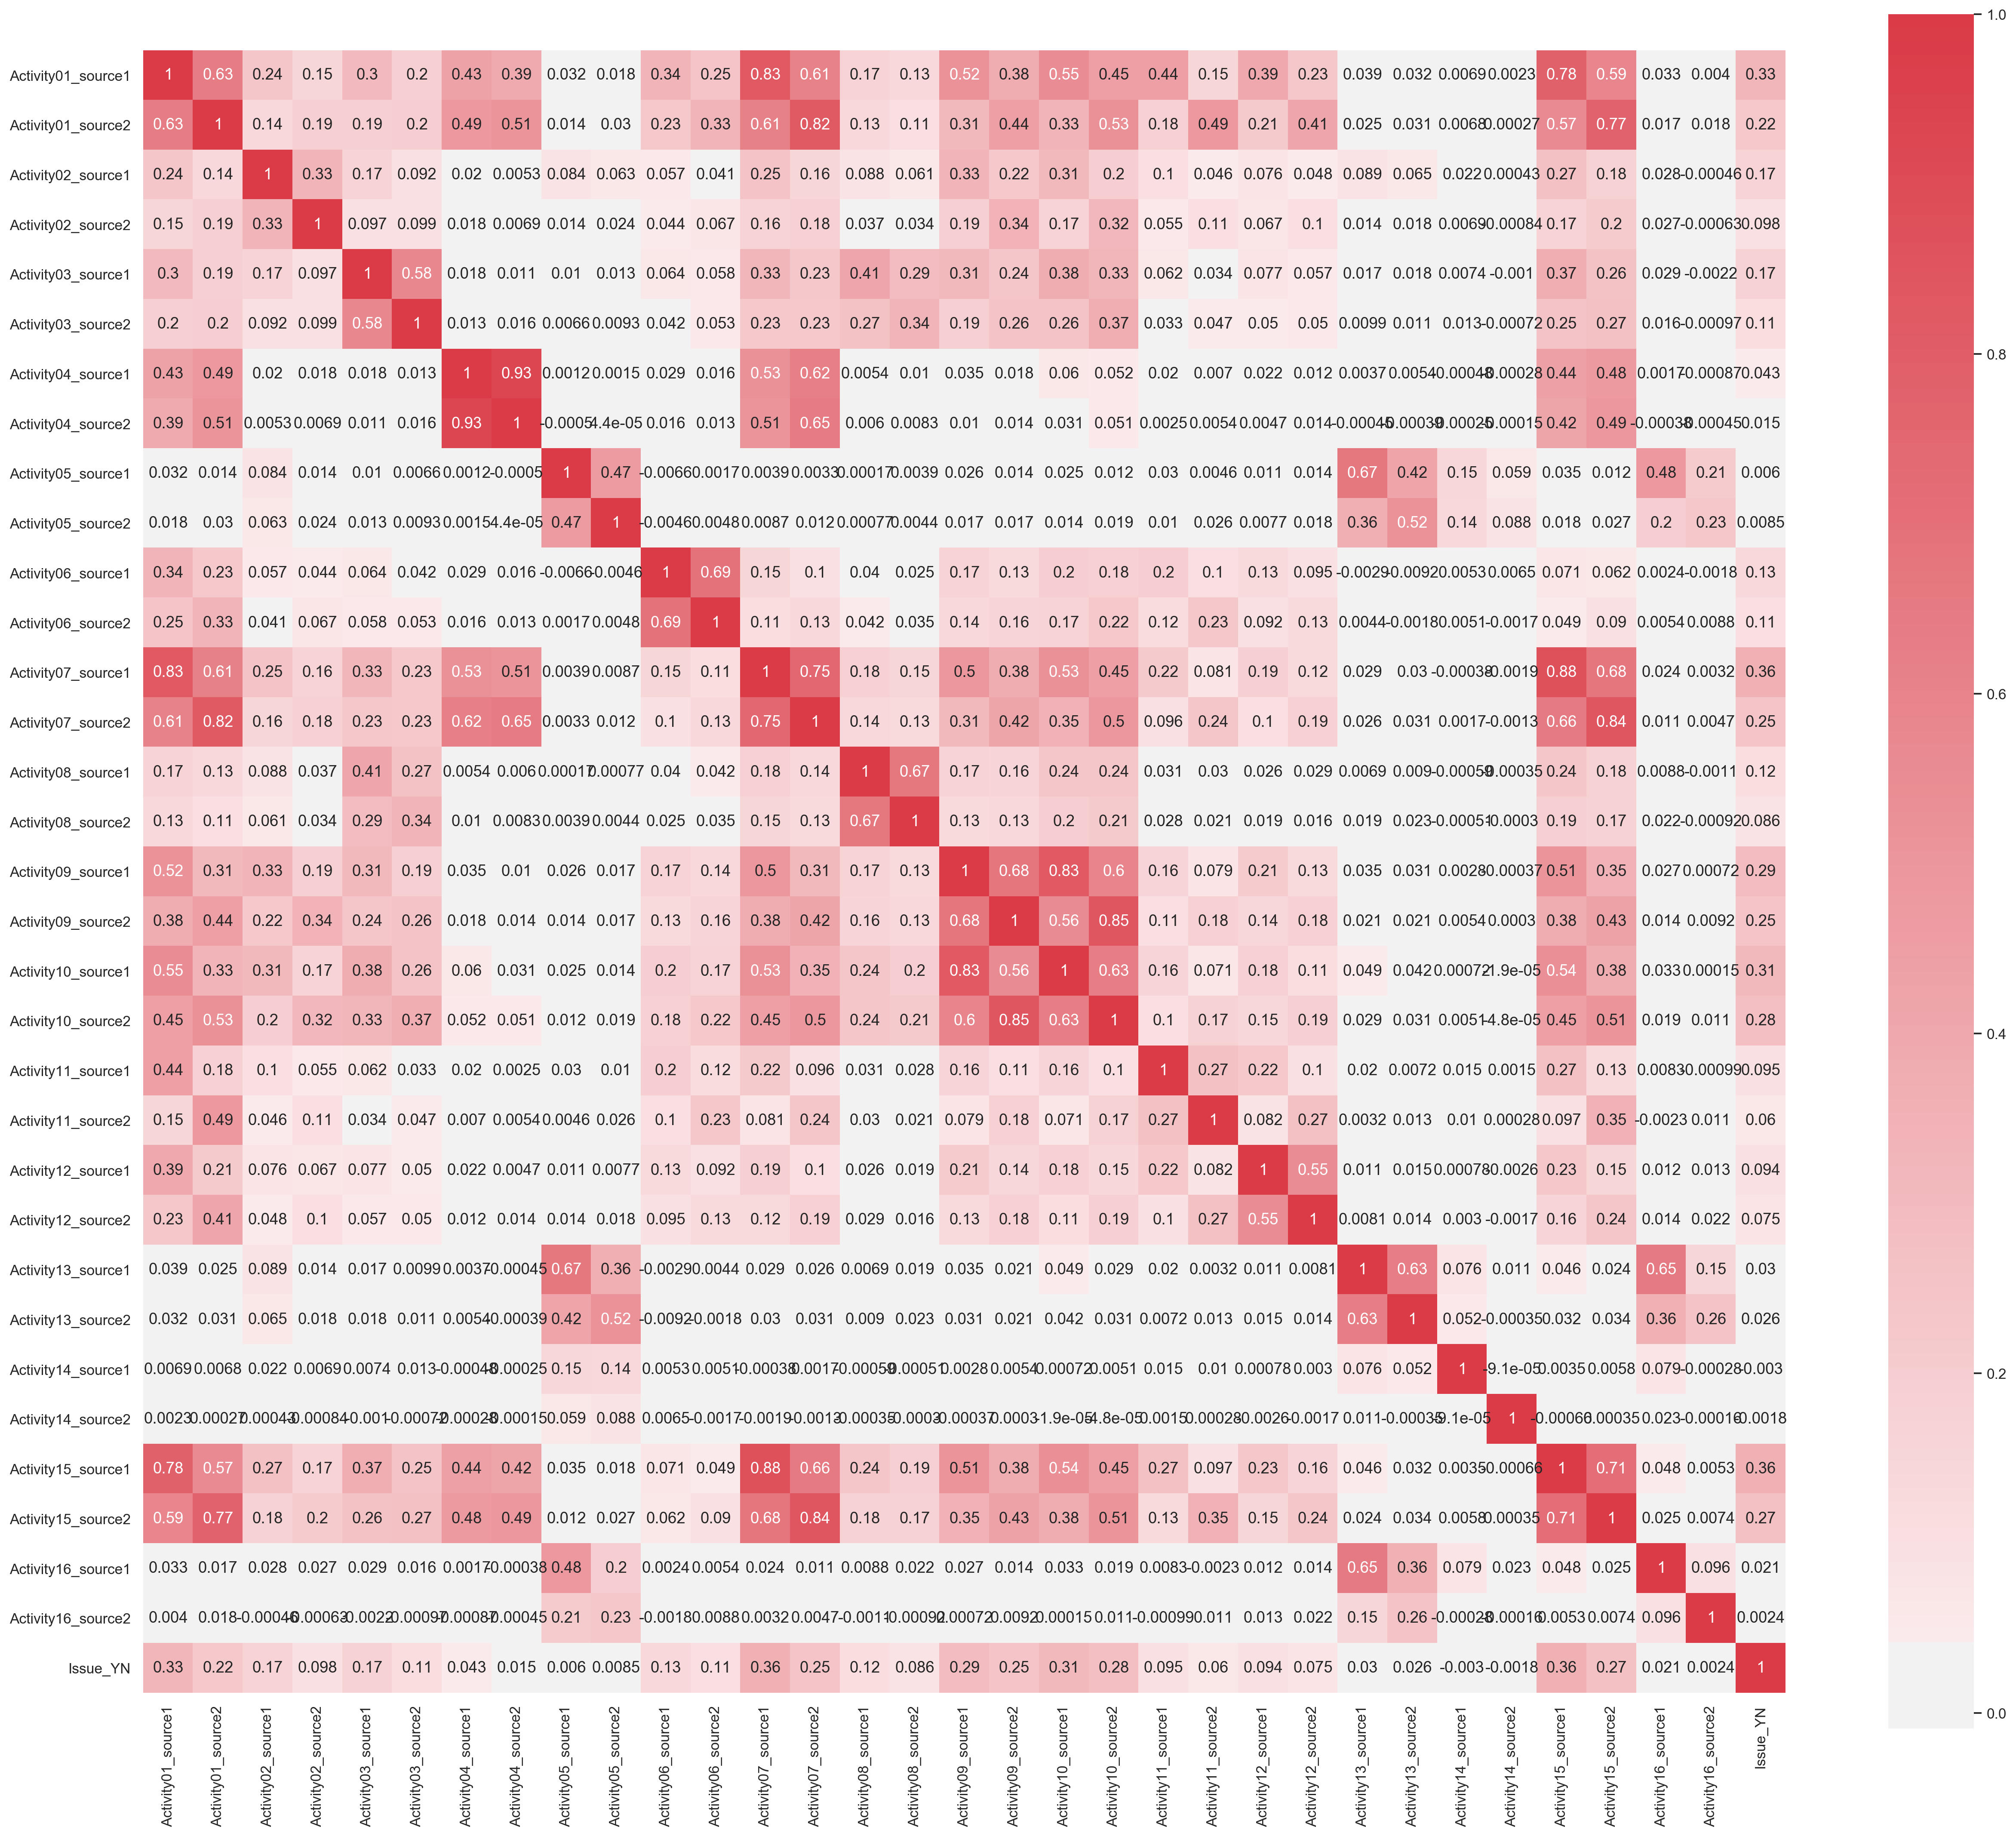

In [16]:
# get correlation matrix
act_source = act_source_issue_zeros.drop('Issue_YN',axis=1)
f, ax = plt.subplots(figsize=(28, 24))
corr = act_source_issue_zeros.corr()
sns_plot =sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),annot=True,cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,center = 0)
fig = sns_plot.get_figure()
plt.show()

In [17]:
act_source = act_source_issue_zeros.drop('Issue_YN',axis=1)
act_source.to_csv('act_source.csv',index=False)

# Combine Source Host Activity

In [18]:
#combine_source_host = df_orig_source_count.merge(df_host_payx_count,how='inner',on='Pseudo_ClientID')
s_h_a = act_source.merge(combine_source_host,how = 'inner', on='Pseudo_ClientID')

In [19]:
s_h_a.to_csv('source_activity_host.csv',index=False)

# Transctions with time conflicts

In [20]:
# label transactions with time conflicts

df['Start']=pd.to_datetime(df['Start'])
df['End']=pd.to_datetime(df['End'])
df=df.sort_values(by=['Pseudo_ClientID','Start'])



# see if there is a conflict between i+1th and ith
df['concurrent_1']=(df['Start']-df[['Pseudo_ClientID','End']]
                                .groupby('Pseudo_ClientID')['End'].shift(1)).astype(int)
# see if there is a conflict between 
df['concurrent_2']=(df[['Pseudo_ClientID','Start']]
                                .groupby('Pseudo_ClientID')['Start'].shift(-1)-df['End']).astype(int)

# nan value will be -9223372036854775808
ol_lis = []
for index,row in df.iterrows():
    if (row['concurrent_1'] == -9223372036854775808 and row['concurrent_2'] >= 0):
        ol_lis.append(0)
    elif (row['concurrent_2'] == -9223372036854775808 and row['concurrent_1'] >= 0):
        ol_lis.append(0)
    elif row['concurrent_1'] < 0 or row['concurrent_2'] < 0:
        ol_lis.append(1)
    else:
        ol_lis.append(0)
        
df['Overlapping_YN'] = ol_lis

# Cluster without Profile Features

In [21]:
# total1101.csv is uploaded to box

df_total = pd.read_csv('total1101.csv')
df_total.fillna(-100,inplace=True)
df_total.isnull().values.any()

False

In [22]:
df_without_profile = df_total.drop(['ACTV_JOB_COUNT', 'ACTV_WRKR_COUNT', 'WRKR_COUNT', 'BANK_COUNT',
       'CHECK_COUNT', 'CLT_PAYCOMP_COUNT', 'CLT_TAX_COUNT', 'GL_ACCT_COUNT',
       'JOB_COUNT', 'LOCATION_COUNT', 'ORG_UNIT_COUNT', 'PAYRUN_COUNT',
       'PAY_PERIOD_COUNT', 'POSITION_COUNT', 'WRKR_PAY_COMP_AVG',
       'WRKR_TAX_AVG', 'NULL_COUNT'],axis = 1)

target = df_without_profile['Issue_YN']
features = df_without_profile.drop(['Issue_YN','Pseudo_ClientID'],axis=1)

In [23]:
normalize_df = pd.DataFrame(np.zeros(features.shape),columns=features.columns)
for i in features.columns:
    normalize_df[i] = (features[i]-features[i].mean())/features[i].std()
    
#normalize_df.fillna(-100,inplace=True)

In [24]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(normalize_df.values)

df_total['knn_label'] = kmeans.labels_

# find out percentage of issue client in each cluster
for i in set(kmeans.labels_):
    temp = df_total[df_total['knn_label'] == i]
    percentage = len(temp[temp['Issue_YN']==1])/len(temp)
    print('This is cluster ',i)
    print('Number of people in this cluster', len(temp))
    print('percentage of issue client = ',percentage)
    print('the percentage of this clust to the total dataset ', len(temp)/len(df_total))

This is cluster  0
Number of people in this cluster 1005
percentage of issue client =  0.5064676616915423
the percentage of this clust to the total dataset  0.026789284286285485
This is cluster  1
Number of people in this cluster 36510
percentage of issue client =  0.042864968501780336
the percentage of this clust to the total dataset  0.9732107157137145


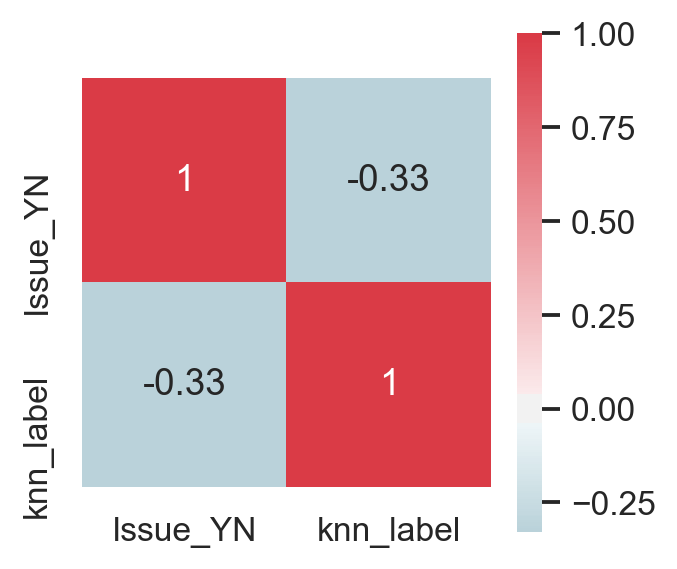

In [25]:
f, ax = plt.subplots(figsize=(3, 3))
corr = df_total[['Issue_YN','knn_label']].corr()
sns_plot =sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),annot=True,cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,center = 0)
fig = sns_plot.get_figure()
plt.show()
#fig.savefig('./cluster_corr.png')

In [29]:
# save to csv, which contians the cluster label
df_total.to_csv('total1119.csv',index=False)

In [30]:
df_total.shape

(37515, 133)